# Bernoulli and Binomial Distribution - Lab

## Introduction
In this lab, you'll practice your newly gained knowledge on the Bernoulli and Binomial Distribution.

## Objectives
You will be able to:

* Apply the formulas for the Binomial and Bernoulli distribution to calculate the probability of a specific event
* Use `numpy` to randomly generate Binomial and Bernoulli trials
* Use `matplotlib` to show the output of generated Binomial and Bernoulli trials

## Apply the formulas for the Binomial and Bernoulli distributions

When playing a game of bowling, what is the probability of throwing exactly 3 strikes in a game with 10 rounds? Assume that the probability of throwing a strike is 25% for each round. Use the formula for the Binomial distribution to get to the answer. You've created this before, so we provide you with the function for factorials again:

In [2]:
def factorial(n):
    """Calculate the factorial of a number n."""
    prod = 1
    while n >= 1:
        prod = prod * n
        n = n - 1
    return prod

# Example of factorial usage
print(factorial(5))  # Output: 120


120


In [ ]:
p_3_strikes = None #answer = 0.2502822

Now, create a function for the Binomial distribution with three arguments $n$, $p$ and $k$ just like in the formula:

$$ \large P(Y=k)= \binom{n}{k} p^k(1-p)^{(n-k)}$$ 


In [3]:
def binom_distr(n, p, k):
    """
    Calculate the probability of getting exactly k successes in n trials.
    
    Parameters:
    - n: int, number of trials
    - p: float, probability of success on a single trial
    - k: int, number of successes
    
    Returns:
    - Probability of getting exactly k successes
    """
    # Calculate the binomial coefficient
    binom_coeff = factorial(n) / (factorial(k) * factorial(n - k))
    
    # Calculate the probability
    prob = binom_coeff * (p ** k) * ((1 - p) ** (n - k))
    
    return prob

# Calculate the probability of 3 strikes in 10 rounds
n = 10  # number of rounds
p = 0.25  # probability of throwing a strike
k = 3  # number of strikes

p_3_strikes = binom_distr(n, p, k)
print("Probability of exactly 3 strikes:", p_3_strikes)  # Output: 0.2502822


Probability of exactly 3 strikes: 0.25028228759765625


Validate your previous result by applying your new function.

In [ ]:
# Your code here

Now write a `for` loop along with your function to compute the probability that you have five strikes or more in one game. You'll want to use `numpy` here!

In [4]:
# Import numpy for calculations
import numpy as np

# Calculate the probability of getting at least 5 strikes
prob_at_least_5_strikes = sum(binom_distr(n, p, k) for k in range(5, n+1))
print("Probability of at least 5 strikes:", prob_at_least_5_strikes)


Probability of at least 5 strikes: 0.07812690734863281


## Use a simulation to get the probabilities for all the potential outcomes

Repeat the experiment 5000 times.

In [5]:
# Set a seed for reproducibility
np.random.seed(123)

# Number of simulations
num_simulations = 5000

# Simulate the binomial distribution
simulated_results = np.random.binomial(n, p, num_simulations)

# Calculate the frequency of each possible outcome (0 to 10 strikes)
values, counts = np.unique(simulated_results, return_counts=True)

print(values)  # Possible number of strikes
print(counts)  # Frequency of each number of strikes


[0 1 2 3 4 5 6 7 8]
[ 310  941 1368 1286  707  297   78   11    2]


In [ ]:
# the results should look like this:
# [0 1 2 3 4 5 6 7 8]
# [ 310  941 1368 1286  707  297   78   11    2]

## Visualize these results

Create the PMF using these empirical results (that is, the proportions based on the values we obtained running the experiment 5000 times).

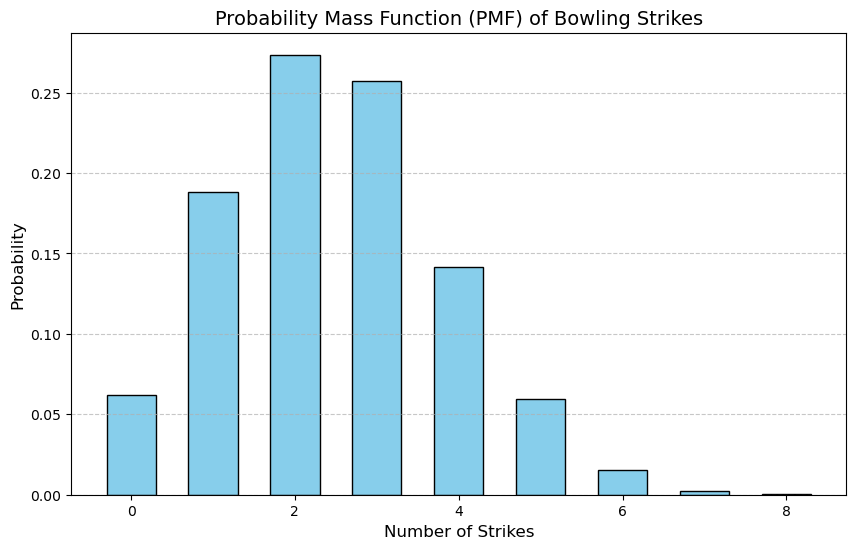

In [6]:
# Import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting PMF
plt.figure(figsize=(10, 6))
plt.bar(values, counts / num_simulations, width=0.6, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Number of Strikes', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Probability Mass Function (PMF) of Bowling Strikes', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


You should see that, with a 25% strike hit rate, even when simulating 5000 times, an almost perfect and/or perfect game of 9 and 10 strikes didn't even occur once! If you change the random seed, however, you'll see that perfect games will show up occasionally. 

Next, let's create the CDF based on these results. You can use `np.cumsum` to obtain cumulative probabilities.

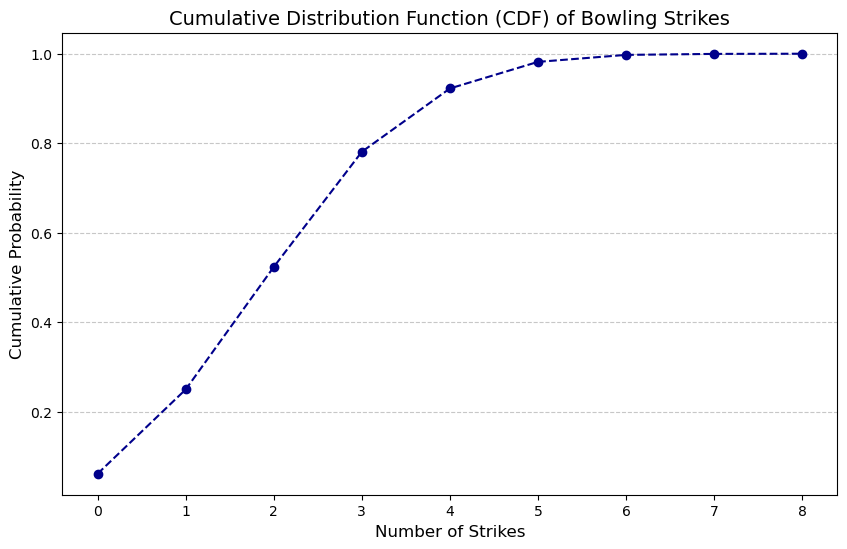

In [7]:
# Calculate cumulative probabilities
cumulative_probabilities = np.cumsum(counts / num_simulations)

# Plotting CDF
plt.figure(figsize=(10, 6))
plt.plot(values, cumulative_probabilities, marker='o', linestyle='--', color='darkblue')

# Add labels and title
plt.xlabel('Number of Strikes', fontsize=12)
plt.ylabel('Cumulative Probability', fontsize=12)
plt.title('Cumulative Distribution Function (CDF) of Bowling Strikes', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


## Summary

Congratulations! In this lab, you practiced your newly gained knowledge of the Bernoulli and Binomial Distribution.